In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

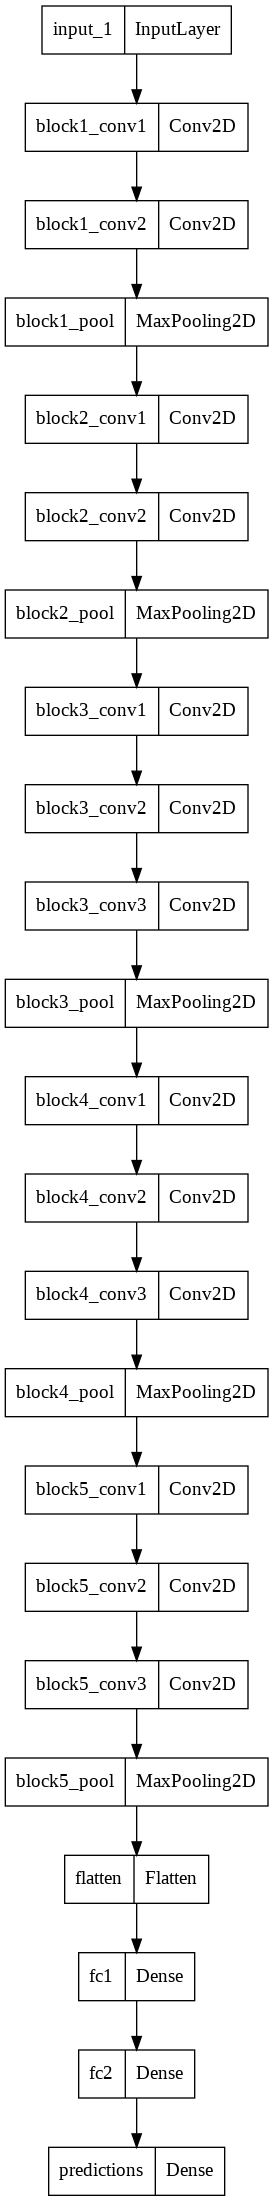

In [3]:
from keras.utils import plot_model
plot_model(model)

In [4]:
for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  filters, biases = model.layers[i].get_weights()
  print('layer number', i, model.layers[i].name, filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [5]:
filters, bias = model.layers[1].get_weights()

In [6]:
fmin, fmax = filters.min(), filters.max()
filters = (filters - fmin) / (fmax - fmin)

In [7]:
import matplotlib
import matplotlib.pyplot as plt

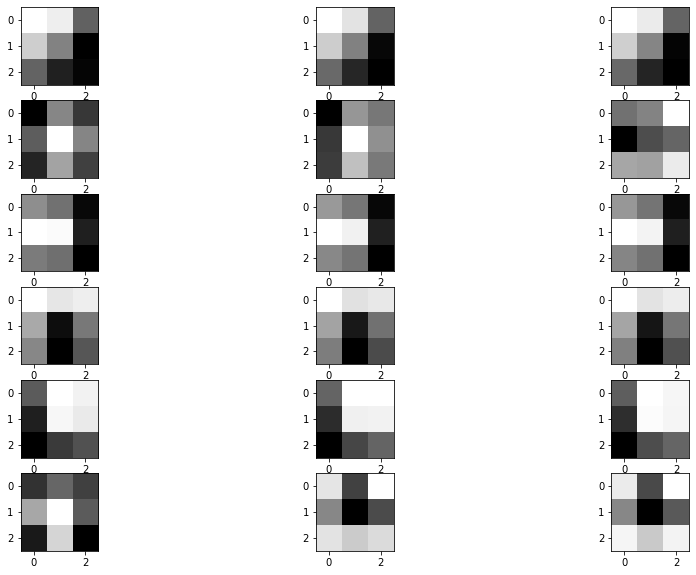

In [8]:
nfilters = 6
ix = 1
fig =  plt.figure(figsize = (15, 10))
for i in range(nfilters):
  f = filters[:, :, :, i]
  for j in range(3):
    plt.subplot(nfilters, 3, ix)
    plt.imshow(f[:, :, j], cmap = 'gray')
    ix += 1
plt.show()

In [9]:
import tensorflow as tw

In [10]:
model=tw.keras.models.Sequential([
    
    tw.keras.layers.Conv2D(8,(3,3),activation ='relu', input_shape=(150,150,3)),
    tw.keras.layers.MaxPooling2D(2,2),
    
    tw.keras.layers.Conv2D(16,(3,3),activation ='relu'),
    tw.keras.layers.MaxPooling2D(2,2),
    
    tw.keras.layers.Conv2D(32,(3,3),activation ='relu'),
    tw.keras.layers.MaxPooling2D(2,2),
    
    tw.keras.layers.Flatten(),
    
    tw.keras.layers.Dense(1024,activation='relu'),
    tw.keras.layers.Dense(512,activation='relu'),
    
    tw.keras.layers.Dense(3,activation='softmax')    
 ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [11]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'flatten',
 'dense',
 'dense_1',
 'dense_2']

In [12]:
model.layers

In [13]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 148, 148, 8) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 74, 74, 8) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 72, 72, 16) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 36, 36, 16) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 34, 34, 32) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 17, 17, 32) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 9248) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_1')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_2')>]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 263ms/step


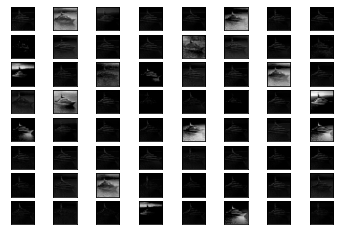

In [14]:

# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('yacht.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
 for _ in range(square):
 # specify subplot and turn of axis
  ax = pyplot.subplot(square, square, ix)
  ax.set_xticks([])
  ax.set_yticks([])
 # plot filter channel in grayscale
  pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
  ix += 1
# show the figure
pyplot.show()

1/1 [==============================] - 0s 498ms/step


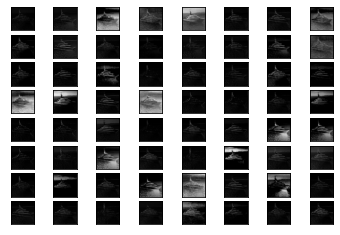

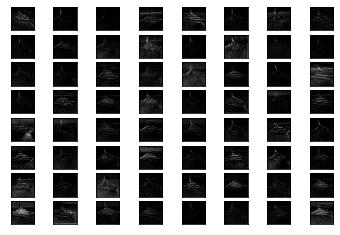

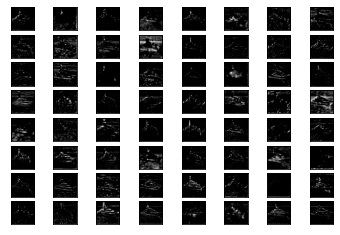

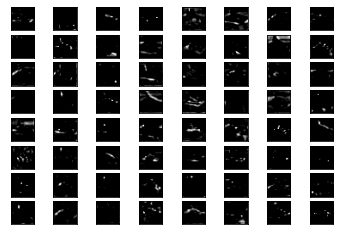

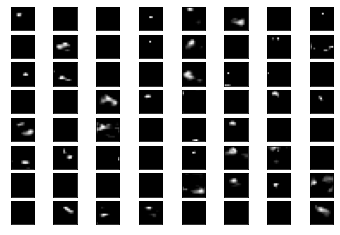

In [15]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('yacht.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
 # plot all 64 maps in an 8x8 squares
 ix = 1
 for _ in range(square):
  for _ in range(square):
 # specify subplot and turn of axis
   ax = pyplot.subplot(square, square, ix)
   ax.set_xticks([])
   ax.set_yticks([])
 # plot filter channel in grayscale
   pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
   ix += 1
 # show the figure
 pyplot.show()